# 分類

In [1]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=db3854d73d77e797702c70b57543cc4608ce3fa7c916884d134306054976fd9f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('wine.data.csv')
print(df)

      ID  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      2    13.20        1.78  2.14               11.2        100   
2      3    13.16        2.36  2.67               18.6        101   
3      4    14.37        1.95  2.50               16.8        113   
4      5    13.24        2.59  2.87               21.0        118   
..   ...      ...         ...   ...                ...        ...   
173  174    13.71        5.65  2.45               20.5         95   
174  175    13.40        3.91  2.48               23.0        102   
175  176    13.27        4.28  2.26               20.0        120   
176  177    13.17        2.59  2.37               20.0        120   
177  178    14.13        4.10  2.74               24.5         96   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65       

# モデル作成

In [5]:
# --------------------(1)-----------------------
X = df[["Alcohol","Malic_acid","Ash","Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315_of_diluted_wines", "Proline"]].to_numpy()
y = df["class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
model = DecisionTreeClassifier(random_state=42)

# テストデータの正解率

In [6]:
# --------------------(2)-----------------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accu = accuracy_score(y_test, y_pred)
print(f"テストデータの正解率は {100*accu} %")

テストデータの正解率は 92.5925925925926 %


# 可視化

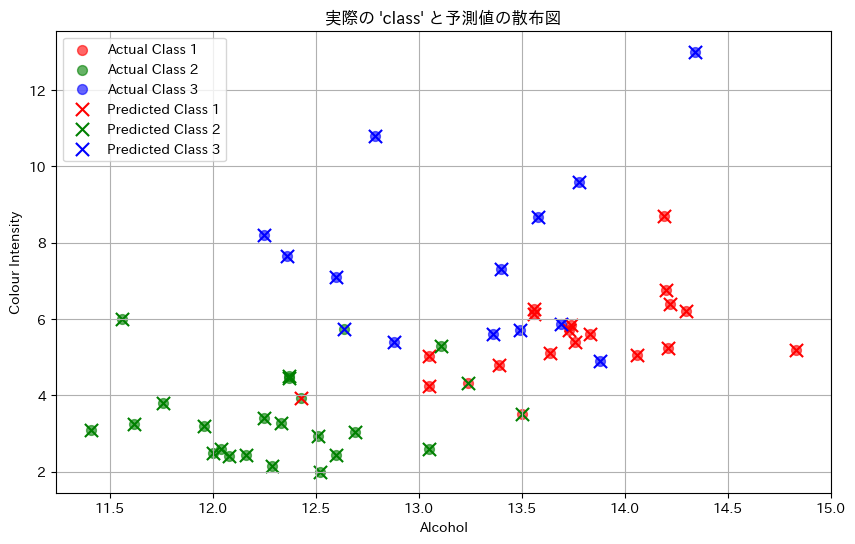

In [12]:
# --------------------(3)-----------------------
# テストデータの予測結果を含むデータフレームを作成
result_df = pd.DataFrame(data=X_test, columns=["Alcohol", "Malic Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Colour Intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])
result_df["Actual Class"] = y_test
result_df["Predicted Class"] = y_pred

# 散布図を作成
plt.figure(figsize=(10, 6))

colorpallet = ["r","g", "b"]

# 実際のclass
for i in range(1, 4):
    class_data = result_df[result_df["Actual Class"] == i]
    plt.scatter(class_data["Alcohol"], class_data["Colour Intensity"], label=f'Actual Class {i}', marker='o', s=50, color=colorpallet[i-1], alpha=0.6)

# 予測値のclass
for i in range(1, 4):
    class_data = result_df[result_df["Predicted Class"] == i]
    plt.scatter(class_data["Alcohol"], class_data["Colour Intensity"], label=f'Predicted Class {i}', marker='x', s=90, color=colorpallet[i-1])

plt.xlabel("Alcohol")
plt.ylabel("Colour Intensity")
plt.title("実際の 'class' と予測値の散布図")
plt.grid()
plt.legend()
plt.show()
